 *full code

carhackingdataset


In [186]:
import pandas as pd

# Dosya yollarını ve ilgili isimleri belirleyin
file_paths = {
    '/home/anil/Desktop/car-hacking/datasets/Carhackingdataset/DoS_dataset.csv': 'dos',
    '/home/anil/Desktop/car-hacking/datasets/Carhackingdataset/Fuzzy_dataset.csv': 'fuzzy',
    '/home/anil/Desktop/car-hacking/datasets/Carhackingdataset/gear_dataset.csv': 'gear',
    '/home/anil/Desktop/car-hacking/datasets/Carhackingdataset/RPM_dataset.csv': 'rpm'
}

# Sütun isimleri
column_names = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']

# Tüm DataFrame'leri saklamak için bir liste oluşturun
dfs = []

# Her bir dosya için işlem yapın
for file_path, df_name in file_paths.items():
    # Dosyayı DataFrame'e yükle
    df = pd.read_csv(file_path, names=column_names)  # Sütun isimlerini belirt
    
    # 'Flag' sütunundaki 'T' değerlerini DataFrame adıyla değiştir
    df['Flag'] = df['Flag'].replace('T', df_name)
    
    # Oluşturulan DataFrame'i listeye ekle
    dfs.append(df)

# Tüm DataFrame'leri alt alta birleştir
combined_df = pd.concat(dfs, ignore_index=True)

# Sonuçları göster
print("Combined DataFrame:")
print(combined_df)


Combined DataFrame:
             Timestamp CAN ID  DLC DATA[0] DATA[1] DATA[2] DATA[3] DATA[4]  \
0         1.478198e+09   0316    8      05      21      68      09      21   
1         1.478198e+09   018f    8      fe      5b      00      00      00   
2         1.478198e+09   0260    8      19      21      22      30      08   
3         1.478198e+09   02a0    8      64      00      9a      1d      97   
4         1.478198e+09   0329    8      40      bb      7f      14      11   
...                ...    ...  ...     ...     ...     ...     ...     ...   
16569470  1.478201e+09   018f    8      fe      59      00      00      00   
16569471  1.478201e+09   0260    8      18      21      21      30      08   
16569472  1.478201e+09   02a0    8      24      00      9a      1d      97   
16569473  1.478201e+09   0329    8      dc      b7      7f      14      11   
16569474  1.478201e+09   0545    8      d8      00      00      8b      00   

         DATA[5] DATA[6] DATA[7] Flag  
0  

In [187]:
# Birleştirilmiş DataFrame'in 'Flag' sütunundaki dağılımı göster
flag_counts = combined_df['Flag'].value_counts()
print("Flag Column Distribution:")
print(flag_counts)


Flag Column Distribution:
Flag
R        14037293
rpm        654897
gear       597252
dos        587521
fuzzy      491847
Name: count, dtype: int64


In [188]:
import pandas as pd

# Her bir Flag değerinden alınacak maksimum sayı
max_count_per_flag = 49184

# Boş bir DataFrame oluşturalım
filtered_df = pd.DataFrame(columns=combined_df.columns)

# Her bir Flag değeri için işlem yapalım
for flag_value in combined_df['Flag'].unique():
    # Flag değerine göre filtreleme yaparak ilgili sayıda veriyi al
    filtered_rows = combined_df[combined_df['Flag'] == flag_value].head(max_count_per_flag)
    
    # Filtrelenmiş satırları yeni DataFrame'e ekle
    filtered_df = pd.concat([filtered_df, filtered_rows], ignore_index=True)

# Sonucu göster
print("Filtered DataFrame:")
print(filtered_df.head())  # İlk birkaç satırı göstermek için

# Dilerseniz bu DataFrame'i başka bir değişkende saklayabilirsiniz
# Örneğin:
# saved_df = filtered_df.copy()


Filtered DataFrame:
      Timestamp CAN ID DLC DATA[0] DATA[1] DATA[2] DATA[3] DATA[4] DATA[5]  \
0  1.478198e+09   0316   8      05      21      68      09      21      21   
1  1.478198e+09   018f   8      fe      5b      00      00      00      3c   
2  1.478198e+09   0260   8      19      21      22      30      08      8e   
3  1.478198e+09   02a0   8      64      00      9a      1d      97      02   
4  1.478198e+09   0329   8      40      bb      7f      14      11      20   

  DATA[6] DATA[7] Flag  
0      00      6f    R  
1      00      00    R  
2      6d      3a    R  
3      bd      00    R  
4      00      14    R  


In [189]:
# Flag sütunundaki dağılımı göster
flag_distribution = filtered_df['Flag'].value_counts()
print("Flag Column Distribution:")
print(flag_distribution)


Flag Column Distribution:
Flag
R        49184
dos      49184
fuzzy    49184
gear     49184
rpm      49184
Name: count, dtype: int64


In [190]:
df=filtered_df

In [191]:
import pandas as pd

# Hexadecimal'den decimal'e çevirme fonksiyonu
def hex_to_dec(hex_value):
    try:
        return int(hex_value, 16)
    except (ValueError, TypeError):
        return None  # Hatalı değerler için None döndür



# Sadece belirli sütunlar üzerinde dönüşüm işlemi
hex_columns = ['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']

for column in hex_columns:
    df[column] = df[column].apply(hex_to_dec)

# İşlenmiş DataFrame'i görüntüleme
print(df.head())  # İlk birkaç satırı yazdırarak işlem sonucunu kontrol edebilirsiniz
print(df.tail())  # Son birkaç satırı yazdırarak işlem sonucunu kontrol edebilirsiniz

# Sonucu başka bir CSV dosyasına kaydetmek için:
df.to_csv("/home/anil/Desktop/car-hacking/datasets/CHDSHAP.csv", index=False)


      Timestamp  CAN ID DLC  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  \
0  1.478198e+09     790   8        5       33      104        9       33   
1  1.478198e+09     399   8      254       91        0        0        0   
2  1.478198e+09     608   8       25       33       34       48        8   
3  1.478198e+09     672   8      100        0      154       29      151   
4  1.478198e+09     809   8       64      187      127       20       17   

   DATA[5]  DATA[6]  DATA[7] Flag  
0       33        0      111    R  
1       60        0        0    R  
2      142      109       58    R  
3        2      189        0    R  
4       32        0       20    R  
           Timestamp  CAN ID DLC  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  \
245915  1.478191e+09     790   8       69       41       36      255       41   
245916  1.478191e+09     790   8       69       41       36      255       41   
245917  1.478191e+09     790   8       69       41       36      255       41   
245

In [192]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report
import shap
from time import perf_counter

# NaN değerleri düşürme
df = df.dropna()

# Özellikler ve etiketleri ayırma
X = df.drop('Flag', axis=1)
y = df['Flag']

# Etiketleri sayısal hale getirme
le = LabelEncoder()
y = le.fit_transform(y)

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test veri setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.95, random_state=42)

start = perf_counter()

# VAE modeli oluşturma
original_dim = X_train.shape[1]
intermediate_dim = 64
latent_dim =32

inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

vae = Model(inputs, x_decoded_mean)

reconstruction_loss = mse(inputs, x_decoded_mean)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

# Modeli derleme
vae.compile(optimizer='adam')

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğitme
history = vae.fit(X_train, X_train, epochs=1, batch_size=32, validation_data=(X_test, X_test), callbacks=[early_stopping])
end = perf_counter()
print(f"Time taken to execute code: {end - start}")

# Modeli kaydetme
model_path = "/home/anil/Desktop/car-hacking/models/vae.h5"
vae.save(model_path)

# Encoder model
encoder = Model(inputs, z_mean)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Classifier (teacher) model
teacher = Sequential()
teacher.add(Dense(64, activation='relu', input_dim=latent_dim))
teacher.add(Dense(32, activation='relu'))
teacher.add(Dense(len(np.unique(y)), activation='softmax'))

teacher.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
teacher.fit(X_train_encoded, y_train, epochs=5, batch_size=32, validation_data=(X_test_encoded, y_test))

# Predictions and classification report for teacher model
y_pred_teacher = teacher.predict(X_test_encoded)
y_pred_classes_teacher = np.argmax(y_pred_teacher, axis=1)
print("Teacher Model Classification Report:")
print(classification_report(y_test, y_pred_classes_teacher))

# Student model
student = Sequential()
student.add(Dense(32, activation='relu', input_dim=latent_dim))
student.add(Dense(16, activation='relu'))
student.add(Dense(len(np.unique(y)), activation='softmax'))

def distillation_loss(y_true, y_pred, temperature=5):
    y_true = tf.keras.backend.softmax(y_true / temperature)
    y_pred = tf.keras.backend.softmax(y_pred / temperature)
    return tf.keras.backend.categorical_crossentropy(y_true, y_pred)

student.compile(optimizer='adam', loss=distillation_loss, metrics=['accuracy'])
student.fit(X_train_encoded, teacher.predict(X_train_encoded), epochs=5, batch_size=64, validation_data=(X_test_encoded, teacher.predict(X_test_encoded)))

# Predictions and classification report for student model
y_pred_student = student.predict(X_test_encoded)
y_pred_classes_student = np.argmax(y_pred_student, axis=1)
print("Student Model Classification Report:")
print(classification_report(y_test, y_pred_classes_student))



385/385 [==============================] - 2s 5ms/step - loss: 1.1746 - val_loss: 1.0257
Time taken to execute code: 2.417241365008522
   1/7301 [..............................] - ETA: 1:33

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


7301/7301 [==============================] - 1s 182us/step
Epoch 1/5
385/385 [==============================] - 3s 6ms/step - loss: 0.5962 - accuracy: 0.9005 - val_loss: 0.1012 - val_accuracy: 0.9826
Epoch 2/5
385/385 [==============================] - 2s 5ms/step - loss: 0.0609 - accuracy: 0.9870 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 3/5
385/385 [==============================] - 2s 5ms/step - loss: 0.0322 - accuracy: 0.9924 - val_loss: 0.0275 - val_accuracy: 0.9938
Epoch 4/5
385/385 [==============================] - 2s 5ms/step - loss: 0.0229 - accuracy: 0.9949 - val_loss: 0.0196 - val_accuracy: 0.9949
Epoch 5/5
7301/7301 [==============================] - 2s 241us/step
Teacher Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     46723
           1       1.00      1.00      1.00     46764
           2       1.00      0.99      0.99     46714
           3       1.00      1.00      1.00     46702


In [193]:
X_test_encoded.shape[1]

32

385/385 [==============================] - 0s 230us/step


Using 12296 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]

811536/811536 [==============================] - 210s 259us/step


100%|██████████| 1/1 [04:41<00:00, 281.78s/it]


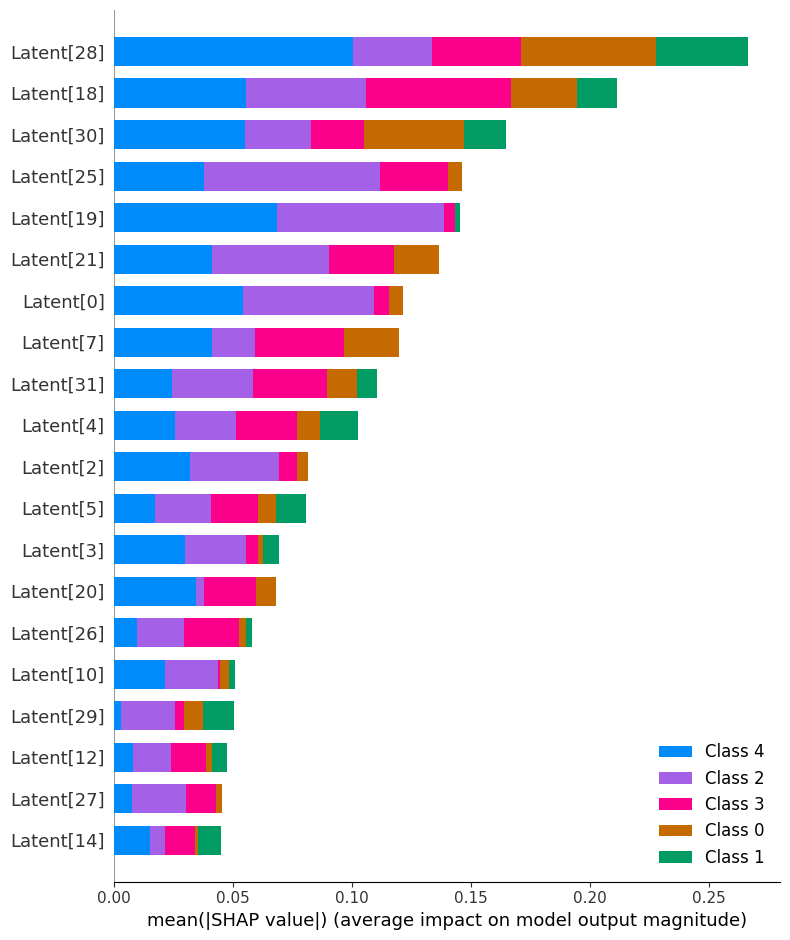

SHAP values for latent dimension 0: [ 0.00589096 -0.00391165 -0.00467946 -0.00232289 -0.00990011 -0.00783621
 -0.00087933 -0.02293011 -0.00334479  0.00848168  0.0037783   0.
 -0.00274417  0.0068284   0.00123106 -0.00545504 -0.00605204 -0.00219164
 -0.02778537  0.         -0.00824273 -0.01922583 -0.00600317  0.00670224
  0.00966024  0.00570492 -0.00273541  0.00265186 -0.05688074 -0.00828953
 -0.0419207  -0.01238761]
SHAP values for latent dimension 1: [ 0.         -0.00056445  0.         -0.00647493 -0.01570402 -0.01264062
  0.          0.         -0.00338981 -0.00219364 -0.00230287 -0.01116144
 -0.00618712 -0.00212667 -0.00973462  0.         -0.01051828 -0.00037808
 -0.01677123 -0.00246072  0.          0.         -0.00160277 -0.00470914
 -0.00314268  0.         -0.0026001   0.         -0.038608   -0.01281572
 -0.01770806 -0.00850953]
SHAP values for latent dimension 2: [-0.05527408 -0.00194531 -0.0375751  -0.02565077  0.02587714  0.02375413
 -0.00963073  0.01826108 -0.00061707 -0.00629

In [194]:
import shap

# SHAP özet grafiği oluştur
#shap.summary_plot(shap_values, X_test_encoded[:1], feature_names=feature_names)
#shap.summary_plot(shap_values, X_test_encoded[:1], feature_names=feature_names[:latent_dim])

# SHAP analysis on the latent space
explainer = shap.KernelExplainer(student.predict, X_train_encoded)
shap_values = explainer.shap_values(X_test_encoded[:1])

# SHAP summary plot for latent dimensions
shap.summary_plot(shap_values, X_test_encoded[:1], feature_names=[f"Latent[{i}]" for i in range(latent_dim)])

# Approximate mapping of SHAP values back to original features (simplified example)
# This step is complex and usually requires additional analysis or heuristics
latent_shap_values = np.array(shap_values).reshape(-1, latent_dim)
for i, latent_shap_value in enumerate(latent_shap_values):
    print(f"SHAP values for latent dimension {i}: {latent_shap_value}")

385/385 [==============================] - 0s 244us/step


Using 12296 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]

811536/811536 [==============================] - 212s 261us/step


100%|██████████| 1/1 [04:42<00:00, 282.72s/it]


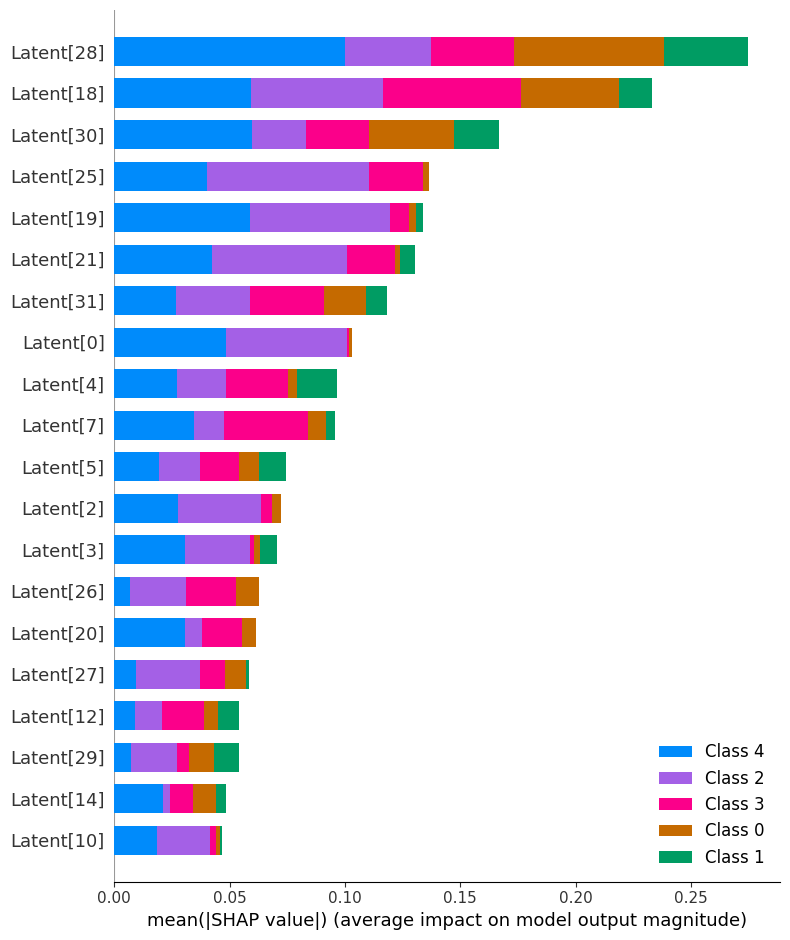

SHAP values for latent dimension 0: [ 0.00154618 -0.00609993  0.00389362  0.00262364 -0.00378355 -0.00865936
  0.         -0.00755876 -0.01031888  0.01144828  0.00170553 -0.00247221
  0.00642672  0.00179834 -0.00990748  0.00655087 -0.00484315 -0.00351147
 -0.04274546 -0.00297859 -0.00569864  0.00224191 -0.0073027   0.00179668
  0.          0.0028076  -0.01003662  0.0091417  -0.0650234  -0.01106232
 -0.03673283 -0.01803458]
SHAP values for latent dimension 1: [ 0.         -0.00075997  0.         -0.00734425 -0.0174065  -0.01176964
 -0.00116471 -0.00375979 -0.0010436  -0.00310161 -0.00088496 -0.01093799
 -0.00895994  0.         -0.00440739 -0.00241803 -0.01130537  0.
 -0.01404068 -0.0033234   0.         -0.00662728 -0.00191379 -0.00280823
 -0.00129465  0.          0.         -0.00130549 -0.03654606 -0.01064749
 -0.01962631 -0.0089074 ]
SHAP values for latent dimension 2: [-0.0524837   0.00311888 -0.03584618 -0.02804973  0.02100844  0.01764307
 -0.01102736  0.01336617  0.         -0.00915

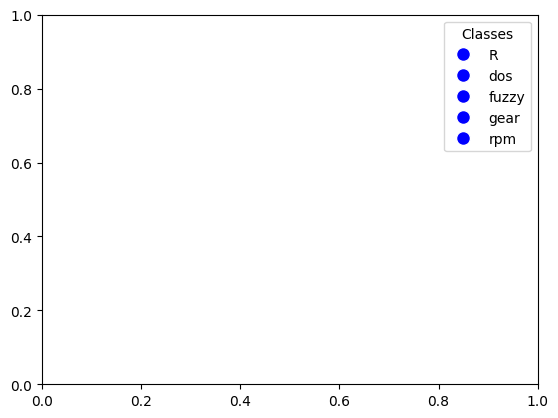

Latent dimension 0 is influenced by features: Timestamp
Latent dimension 1 is influenced by features: CAN ID
Latent dimension 2 is influenced by features: DLC
Latent dimension 3 is influenced by features: DATA[0]
Latent dimension 4 is influenced by features: DATA[1]
Latent dimension 5 is influenced by features: DATA[2]
Latent dimension 6 is influenced by features: DATA[3]
Latent dimension 7 is influenced by features: DATA[4]
Latent dimension 8 is influenced by features: DATA[5]
Latent dimension 9 is influenced by features: DATA[6]
Latent dimension 10 is influenced by features: DATA[7]
Latent dimension 11 is influenced by features: Timestamp
Latent dimension 12 is influenced by features: CAN ID
Latent dimension 13 is influenced by features: DLC
Latent dimension 14 is influenced by features: DATA[0]
Latent dimension 15 is influenced by features: DATA[1]
Latent dimension 16 is influenced by features: DATA[2]
Latent dimension 17 is influenced by features: DATA[3]
Latent dimension 18 is inf

In [195]:
import shap

# Class names
class_names = ['R', 'dos', 'fuzzy', 'gear', 'rpm']

# SHAP analysis on the latent space
explainer = shap.KernelExplainer(student.predict, X_train_encoded)
shap_values = explainer.shap_values(X_test_encoded[:1])

# SHAP summary plot for latent dimensions
shap.summary_plot(shap_values, X_test_encoded[:1], feature_names=[f"Latent[{i}]" for i in range(latent_dim)])

# Approximate mapping of SHAP values back to original features (simplified example)
# This step is complex and usually requires additional analysis or heuristics
latent_shap_values = np.array(shap_values).reshape(-1, latent_dim)
for i, latent_shap_value in enumerate(latent_shap_values):
    print(f"SHAP values for latent dimension {i}: {latent_shap_value}")

# Custom legend for class names
class_names = ['R', 'dos', 'fuzzy', 'gear', 'rpm']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=class_name, markersize=10, markerfacecolor='blue') for class_name in class_names]
plt.legend(handles=handles, title='Classes')

plt.show()

# Indicate which latent dimensions relate to which original features
# Note: This is a simplified example. The actual relationship is complex and depends on the VAE's learned representation.
feature_names = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
for i in range(latent_dim):
    print(f"Latent dimension {i} is influenced by features: {feature_names[i % len(feature_names)]}")

94/94 [==============================] - 0s 267us/step


Using 2997 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]

197802/197802 [==============================] - 52s 260us/step


100%|██████████| 1/1 [01:09<00:00, 69.09s/it]


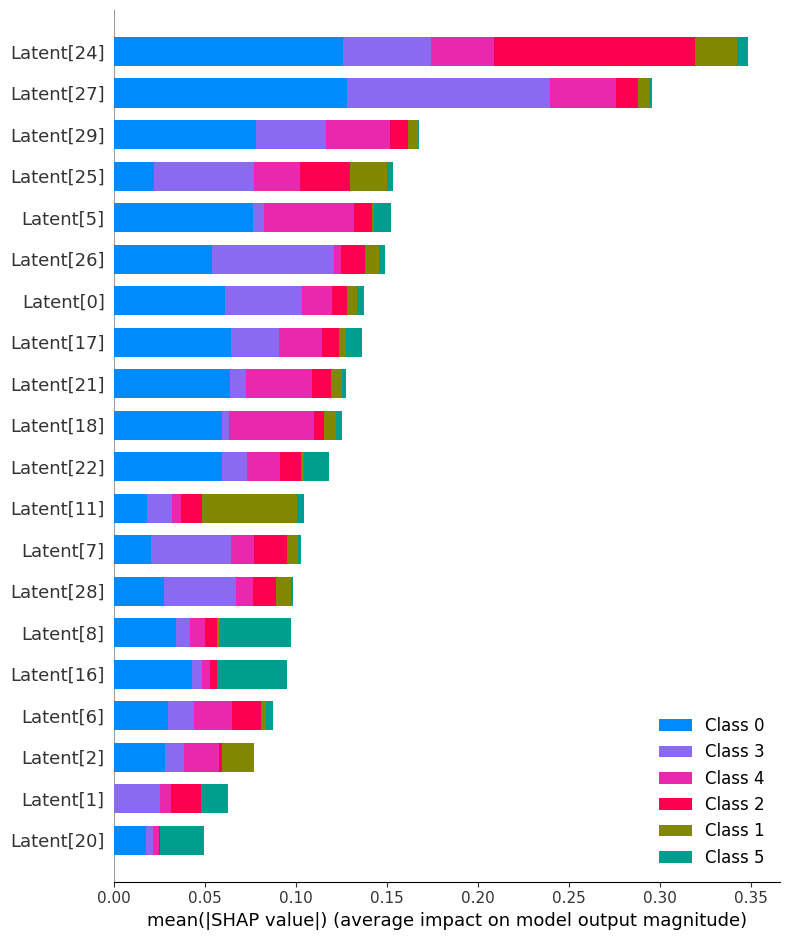

SHAP values for latent dimension 0: [ 0.06061893  0.          0.02758008 -0.00792288  0.00325949  0.07612786
  0.02945282  0.02021228  0.03376309 -0.00701287  0.0109507   0.01772965
  0.01786665 -0.0031068  -0.00656929  0.00409294  0.04273113  0.06438608
 -0.05905894 -0.00200873  0.01721505  0.06380738  0.05907474 -0.00550842
  0.12569393  0.02190433  0.05364676  0.12797945 -0.02704871  0.07797168
 -0.01006906  0.00177672]
SHAP values for latent dimension 1: [-0.00560295  0.         -0.01711147  0.         -0.00776243 -0.00069361
 -0.00275138 -0.00590253 -0.0014363  -0.00158234  0.         -0.05206589
 -0.01137089 -0.0087748  -0.00191461  0.          0.          0.0037261
  0.00638881  0.          0.         -0.00620965 -0.00205291  0.
 -0.02296027 -0.02068064  0.00715222  0.00598809 -0.00846752  0.00521563
  0.00268246 -0.01459594]
SHAP values for latent dimension 2: [ 0.00791895 -0.01667029 -0.00165831 -0.00579451 -0.00643014 -0.00987454
 -0.01597845  0.01852586  0.00675283 -0.001197

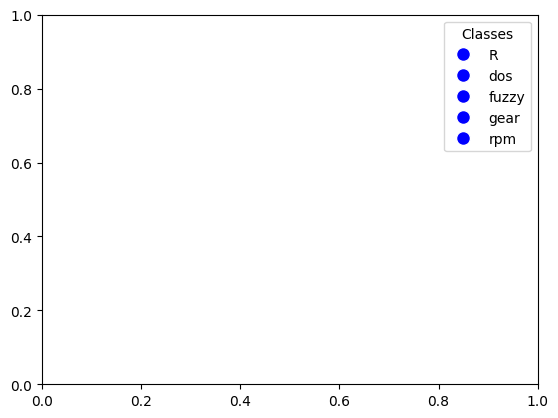

Latent dimension 0 is influenced by features: Timestamp
Latent dimension 1 is influenced by features: CAN ID
Latent dimension 2 is influenced by features: DLC
Latent dimension 3 is influenced by features: DATA[0]
Latent dimension 4 is influenced by features: DATA[1]
Latent dimension 5 is influenced by features: DATA[2]
Latent dimension 6 is influenced by features: DATA[3]
Latent dimension 7 is influenced by features: DATA[4]
Latent dimension 8 is influenced by features: DATA[5]
Latent dimension 9 is influenced by features: DATA[6]
Latent dimension 10 is influenced by features: DATA[7]
Latent dimension 11 is influenced by features: Timestamp
Latent dimension 12 is influenced by features: CAN ID
Latent dimension 13 is influenced by features: DLC
Latent dimension 14 is influenced by features: DATA[0]
Latent dimension 15 is influenced by features: DATA[1]
Latent dimension 16 is influenced by features: DATA[2]
Latent dimension 17 is influenced by features: DATA[3]
Latent dimension 18 is inf

In [199]:
# SHAP analysis on the latent space TEACHER MODEL
explainer = shap.KernelExplainer(teacher.predict, X_train_encoded)
shap_values = explainer.shap_values(X_test_encoded[:1])

# SHAP summary plot for latent dimensions
shap.summary_plot(shap_values, X_test_encoded[:1], feature_names=[f"Latent[{i}]" for i in range(latent_dim)])

# Approximate mapping of SHAP values back to original features (simplified example)
# This step is complex and usually requires additional analysis or heuristics
latent_shap_values = np.array(shap_values).reshape(-1, latent_dim)
for i, latent_shap_value in enumerate(latent_shap_values):
    print(f"SHAP values for latent dimension {i}: {latent_shap_value}")

# Custom legend for class names
class_names = ['R', 'dos', 'fuzzy', 'gear', 'rpm']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=class_name, markersize=10, markerfacecolor='blue') for class_name in class_names]
plt.legend(handles=handles, title='Classes')
plt.show()

# Indicate which latent dimensions relate to which original features
# Note: This is a simplified example. The actual relationship is complex and depends on the VAE's learned representation.
feature_names = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
for i in range(latent_dim):
    print(f"Latent dimension {i} is influenced by features: {feature_names[i % len(feature_names)]}")

*ciciov

In [196]:
import os
import pandas as pd

# Dizin yolunu tanımlayın
directory_path = '/home/anil/Desktop/car-hacking/datasets/CICIoV2024-main'

# DataFrame'leri tutmak için boş bir liste başlatın
dfs = []

# Dizin içindeki tüm dosyaları döngü ile işleyin
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Tam dosya yolunu oluşturun
        file_path = os.path.join(directory_path, filename)
        # CSV dosyasını bir DataFrame'e okuyun
        df = pd.read_csv(file_path)
        # 'label' ve 'category' sütunlarını kaldırın
        if 'label' in df.columns:
            df = df.drop(columns=['label'])
        if 'category' in df.columns:
            df = df.drop(columns=['category'])
        # DataFrame'i listeye ekleyin
        dfs.append(df)

# Listedeki tüm DataFrame'leri tek bir DataFrame'de birleştirin
combined_df = pd.concat(dfs, ignore_index=True)

# 'specific_class' sütununa göre gruplandırın ve her sınıftan 9991 örnek alın
sampled_df = combined_df.groupby('specific_class').apply(lambda x: x.sample(min(9991, len(x)))).reset_index(drop=True)

# Birleştirilmiş ve örneklenmiş DataFrame'i görüntüleyin
print(sampled_df.head())
print(f"Örneklenmiş DataFrame boyutu: {sampled_df.shape}")

# Sonucu başka bir CSV dosyasına kaydedin
output_path = "/home/anil/Desktop/car-hacking/datasets/CICIOVSHAP.csv"
sampled_df.to_csv(output_path, index=False)


     ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0   514      28     238     120       0      64       0       0       0   
1   516     192       0     125       0       0       0       0       0   
2  1072     131       0       7      52     100       1      18     147   
3   534       0       0       0       0     195       0       0       0   
4   512       0       0     130      79     130      79     240       0   

  specific_class  
0         BENIGN  
1         BENIGN  
2         BENIGN  
3         BENIGN  
4         BENIGN  
Örneklenmiş DataFrame boyutu: (59946, 10)


In [197]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import shap
import numpy as np
from time import perf_counter

# Load and preprocess the dataset
df = sampled_df

# Drop rows with NaN values
df = df.dropna()

# Separate features and labels
X = df.drop('specific_class', axis=1)
y = df['specific_class']

# Encode labels as numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.95, random_state=42)

# VAE model definition
start = perf_counter()
original_dim = X_train.shape[1]
intermediate_dim = 64
latent_dim = 32

inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

vae = Model(inputs, x_decoded_mean)

reconstruction_loss = mse(inputs, x_decoded_mean)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

# Compile the VAE model
vae.compile(optimizer='adam')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the VAE model
history = vae.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test), callbacks=[early_stopping])

end = perf_counter()
print(f"Time taken to execute code: {end - start} seconds")

# Save the VAE model
model_path = "/home/anil/Desktop/car-hacking/models/vae.h5"
vae.save(model_path)

# Encoder model
encoder = Model(inputs, z_mean)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Classification model
classifier = Sequential()
classifier.add(Dense(64, activation='relu', input_dim=latent_dim))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(len(np.unique(y)), activation='softmax'))

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classification model
classifier.fit(X_train_encoded, y_train, epochs=100, batch_size=32, validation_data=(X_test_encoded, y_test))

# Predict and evaluate the classification model
y_pred = classifier.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# Teacher model
teacher = classifier

# Student model
student = Sequential()
student.add(Dense(32, activation='relu', input_dim=latent_dim))
student.add(Dense(16, activation='relu'))
student.add(Dense(len(np.unique(y)), activation='softmax'))

def distillation_loss(y_true, y_pred, temperature=5):
    y_true = tf.keras.backend.softmax(y_true / temperature)
    y_pred = tf.keras.backend.softmax(y_pred / temperature)
    return tf.keras.backend.categorical_crossentropy(y_true, y_pred)

student.compile(optimizer='adam', loss=distillation_loss, metrics=['accuracy'])

# Train the student model
student.fit(X_train_encoded, teacher.predict(X_train_encoded), epochs=100, batch_size=32, validation_data=(X_test_encoded, teacher.predict(X_test_encoded)))

# Predict and evaluate the student model
student_pred_probs = student.predict(X_test_encoded)
student_pred_labels = np.argmax(student_pred_probs, axis=1)

teacher_pred_labels = np.argmax(teacher.predict(X_test_encoded), axis=1)

report = classification_report(teacher_pred_labels, student_pred_labels)
print("Classification Report for Student Model:")
print(report)


Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.9322 - val_loss: 0.5568
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5032 - val_loss: 0.4873
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4759 - val_loss: 0.4744
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4659 - val_loss: 0.4686
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4608 - val_loss: 0.4663
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4615 - val_loss: 0.4652
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4589 - val_loss: 0.4630
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4577 - val_loss: 0.4617
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4562 - val_loss: 0.4605
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4549 - val_loss: 0.4603
Epoch 11/

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


1780/1780 [==============================] - 0s 228us/step
Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 1.7653 - accuracy: 0.2940 - val_loss: 1.7174 - val_accuracy: 0.4159
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 1.6018 - accuracy: 0.3861 - val_loss: 1.4734 - val_accuracy: 0.4158
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 1.3834 - accuracy: 0.5152 - val_loss: 1.2983 - val_accuracy: 0.7276
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 1.2487 - accuracy: 0.6413 - val_loss: 1.1757 - val_accuracy: 0.6523
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 1.1230 - accuracy: 0.6854 - val_loss: 1.0509 - val_accuracy: 0.6906
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.9909 - accuracy: 0.6954 - val_loss: 0.9180 - val_accuracy: 0.7750
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.8730 - accuracy: 0.7

94/94 [==============================] - 0s 222us/step


Using 2997 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]

197802/197802 [==============================] - 54s 274us/step


100%|██████████| 1/1 [01:11<00:00, 71.69s/it]


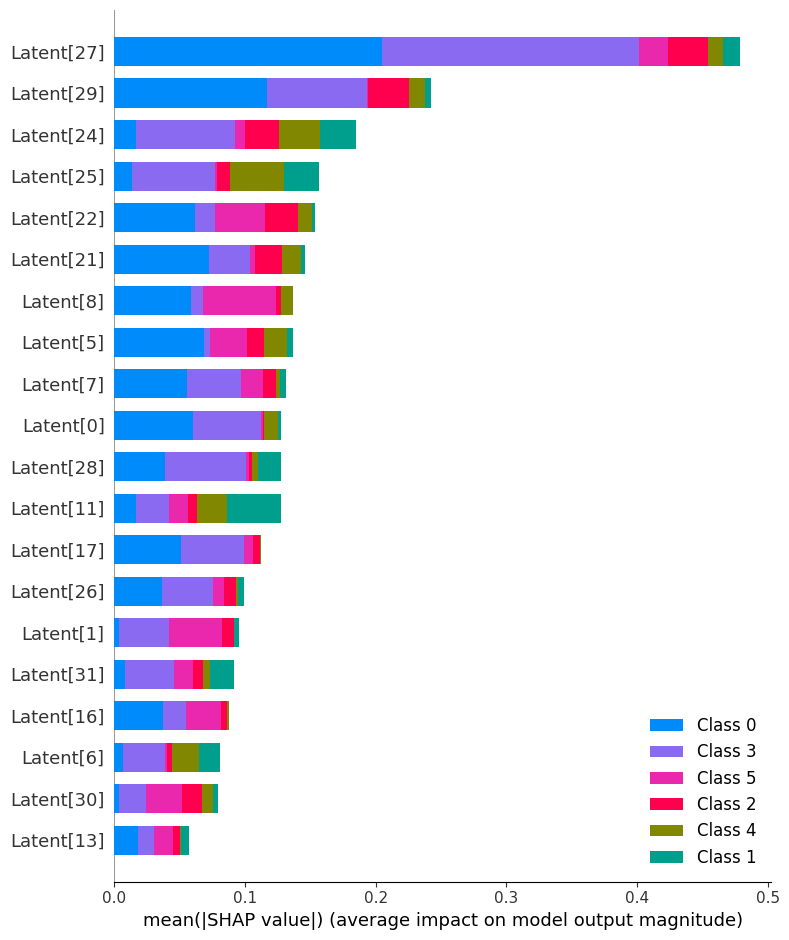

SHAP values for latent dimension 0: [ 0.06033676 -0.00342531 -0.00300988  0.01270525  0.01078929  0.06825219
  0.00639571  0.05539076  0.05862172 -0.00265225 -0.00423322  0.01644809
  0.00748386 -0.01786717  0.00262987  0.00429887  0.03752723  0.05113412
 -0.01927919 -0.00962803  0.00153751  0.07281249  0.06144977  0.0205883
  0.01684232  0.0138333   0.03681067  0.20491875 -0.03883148  0.11647129
 -0.00379627 -0.00809225]
SHAP values for latent dimension 1: [ 0.00282093 -0.0037421  -0.01221995  0.00515656 -0.00946525 -0.00434815
 -0.01570649 -0.00427667  0.          0.          0.00344277 -0.04108442
 -0.00755603 -0.00577448 -0.00372913  0.          0.          0.
  0.         -0.00087989  0.00079729 -0.0025987  -0.00200583  0.00286085
 -0.02812322 -0.0270136   0.00440802  0.01255832 -0.01739269  0.00469615
  0.00384937 -0.01811512]
SHAP values for latent dimension 2: [ 0.00072436  0.00926866  0.00227991 -0.01483129 -0.00350199 -0.01290068
 -0.0034696   0.01010775 -0.00379752 -0.003022

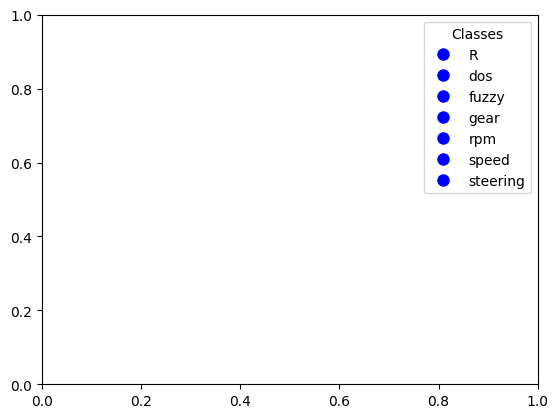

Latent dimension 0 is influenced by features: CAN ID
Latent dimension 1 is influenced by features: DATA[0]
Latent dimension 2 is influenced by features: DATA[1]
Latent dimension 3 is influenced by features: DATA[2]
Latent dimension 4 is influenced by features: DATA[3]
Latent dimension 5 is influenced by features: DATA[4]
Latent dimension 6 is influenced by features: DATA[5]
Latent dimension 7 is influenced by features: DATA[6]
Latent dimension 8 is influenced by features: DATA[7]
Latent dimension 9 is influenced by features: CAN ID
Latent dimension 10 is influenced by features: DATA[0]
Latent dimension 11 is influenced by features: DATA[1]
Latent dimension 12 is influenced by features: DATA[2]
Latent dimension 13 is influenced by features: DATA[3]
Latent dimension 14 is influenced by features: DATA[4]
Latent dimension 15 is influenced by features: DATA[5]
Latent dimension 16 is influenced by features: DATA[6]
Latent dimension 17 is influenced by features: DATA[7]
Latent dimension 18 is

In [198]:
import shap

# Class names


# SHAP analysis on the latent space
explainer = shap.KernelExplainer(student.predict, X_train_encoded)
shap_values = explainer.shap_values(X_test_encoded[:1])

# SHAP summary plot for latent dimensions
shap.summary_plot(shap_values, X_test_encoded[:1], feature_names=[f"Latent[{i}]" for i in range(latent_dim)])

# Approximate mapping of SHAP values back to original features (simplified example)
# This step is complex and usually requires additional analysis or heuristics
latent_shap_values = np.array(shap_values).reshape(-1, latent_dim)
for i, latent_shap_value in enumerate(latent_shap_values):
    print(f"SHAP values for latent dimension {i}: {latent_shap_value}")

# Custom legend for class names
class_names = ['R', 'dos', 'fuzzy', 'gear', 'rpm','speed','steering']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=class_name, markersize=10, markerfacecolor='blue') for class_name in class_names]
plt.legend(handles=handles, title='Classes')

plt.show()

# Indicate which latent dimensions relate to which original features
# Note: This is a simplified example. The actual relationship is complex and depends on the VAE's learned representation.
feature_names = [ 'CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
for i in range(latent_dim):
    print(f"Latent dimension {i} is influenced by features: {feature_names[i % len(feature_names)]}")

94/94 [==============================] - 0s 263us/step


Using 2997 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]

197802/197802 [==============================] - 51s 256us/step


100%|██████████| 1/1 [01:08<00:00, 68.23s/it]


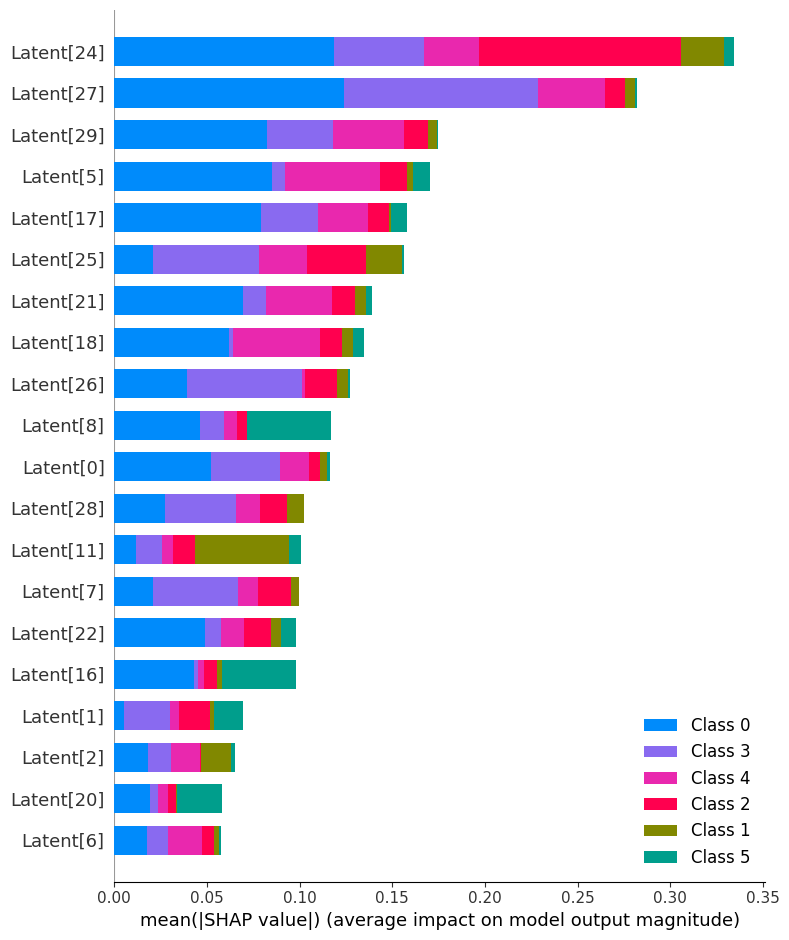

SHAP values for latent dimension 0: [ 0.05226058  0.00504277  0.01819436 -0.00838855  0.00581998  0.08518383
  0.01776493  0.02077144  0.04596623 -0.00800672  0.0111446   0.0116346
  0.01867963 -0.00509549 -0.00167954  0.00529973  0.04277688  0.07907823
 -0.06168676  0.01009281  0.01922985  0.06947245  0.04909281 -0.00804326
  0.11836341  0.02111307  0.03920743  0.12367753 -0.02758131  0.08245364
 -0.00230307  0.        ]
SHAP values for latent dimension 1: [-3.70863262e-03 -2.03082637e-03 -1.62400531e-02  1.57956287e-05
 -7.88111556e-03 -3.18652956e-03 -2.63099136e-03 -4.27580164e-03
  0.00000000e+00  1.23413300e-03  1.95040707e-03 -5.02843139e-02
 -1.21678304e-02 -8.78864089e-03 -1.14274283e-03 -8.83359087e-04
  2.66385558e-03 -1.10824791e-03  6.39123439e-03 -5.93761861e-04
 -6.31836240e-04 -5.96541464e-03 -5.04341349e-03  3.35335162e-03
 -2.31593396e-02 -1.92837971e-02  5.87106692e-03  5.62773648e-03
 -9.02548343e-03  4.75098978e-03  1.77512309e-03 -1.63843858e-02]
SHAP values for l

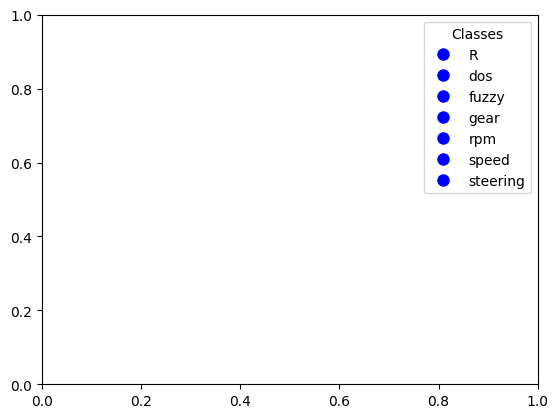

Latent dimension 0 is influenced by features: CAN ID
Latent dimension 1 is influenced by features: DATA[0]
Latent dimension 2 is influenced by features: DATA[1]
Latent dimension 3 is influenced by features: DATA[2]
Latent dimension 4 is influenced by features: DATA[3]
Latent dimension 5 is influenced by features: DATA[4]
Latent dimension 6 is influenced by features: DATA[5]
Latent dimension 7 is influenced by features: DATA[6]
Latent dimension 8 is influenced by features: DATA[7]
Latent dimension 9 is influenced by features: CAN ID
Latent dimension 10 is influenced by features: DATA[0]
Latent dimension 11 is influenced by features: DATA[1]
Latent dimension 12 is influenced by features: DATA[2]
Latent dimension 13 is influenced by features: DATA[3]
Latent dimension 14 is influenced by features: DATA[4]
Latent dimension 15 is influenced by features: DATA[5]
Latent dimension 16 is influenced by features: DATA[6]
Latent dimension 17 is influenced by features: DATA[7]
Latent dimension 18 is

In [200]:
# SHAP analysis on the latent space TEACHER MODEL
explainer = shap.KernelExplainer(teacher.predict, X_train_encoded)
shap_values = explainer.shap_values(X_test_encoded[:1])

# SHAP summary plot for latent dimensions
shap.summary_plot(shap_values, X_test_encoded[:1], feature_names=[f"Latent[{i}]" for i in range(latent_dim)])

# Approximate mapping of SHAP values back to original features (simplified example)
# This step is complex and usually requires additional analysis or heuristics
latent_shap_values = np.array(shap_values).reshape(-1, latent_dim)
for i, latent_shap_value in enumerate(latent_shap_values):
    print(f"SHAP values for latent dimension {i}: {latent_shap_value}")

# Custom legend for class names
class_names = ['R', 'dos', 'fuzzy', 'gear', 'rpm','speed','steering']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=class_name, markersize=10, markerfacecolor='blue') for class_name in class_names]
plt.legend(handles=handles, title='Classes')

plt.show()

# Indicate which latent dimensions relate to which original features
# Note: This is a simplified example. The actual relationship is complex and depends on the VAE's learned representation.
feature_names = [ 'CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
for i in range(latent_dim):
    print(f"Latent dimension {i} is influenced by features: {feature_names[i % len(feature_names)]}")